In [1]:
# Import all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis

In [3]:
# Import Train and Test dataset and create df dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test], axis=0)

In [4]:
print(train.shape)
print(test.shape)
print(df.shape)

(1460, 81)
(1459, 80)
(2919, 81)


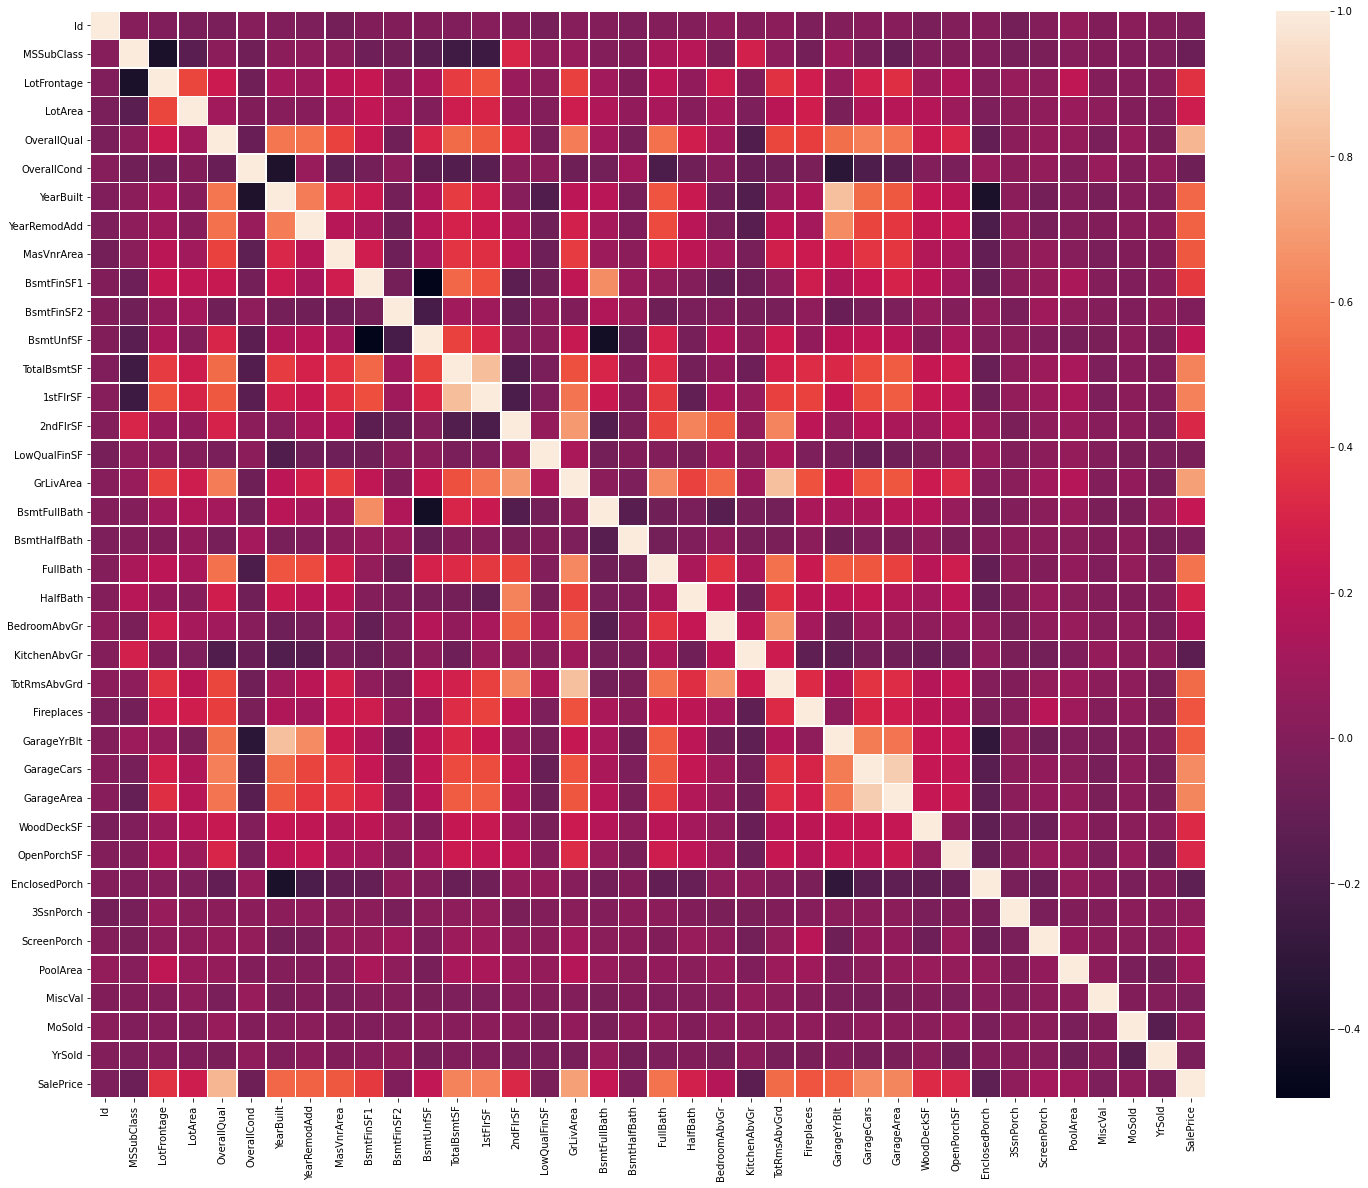

In [5]:
f, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(train.corr(), linewidth=.5)

Because the features are not strongly correlated with each other, we do not need to take up any Dimensionality Reduction. Also, the columns that seem highly correlated to Sale Price are Overall Quality and GrLiveArea.

# Bivariate Analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

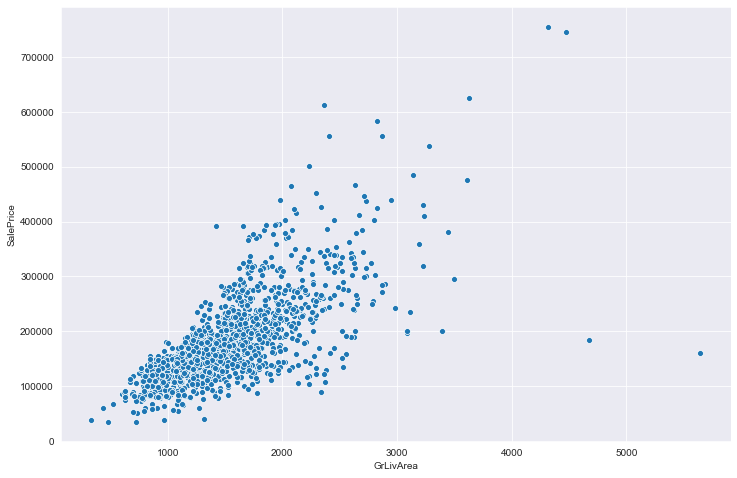

In [6]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

We can observe that there are 2 points on the Graph which do not fall in the region of Line of Fit. These have GrLivArea > 4000 and Sale Price < 200,000. We can treat them as outliers and drop them from the dataset (Abnormally high area for the sale price)

In [7]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

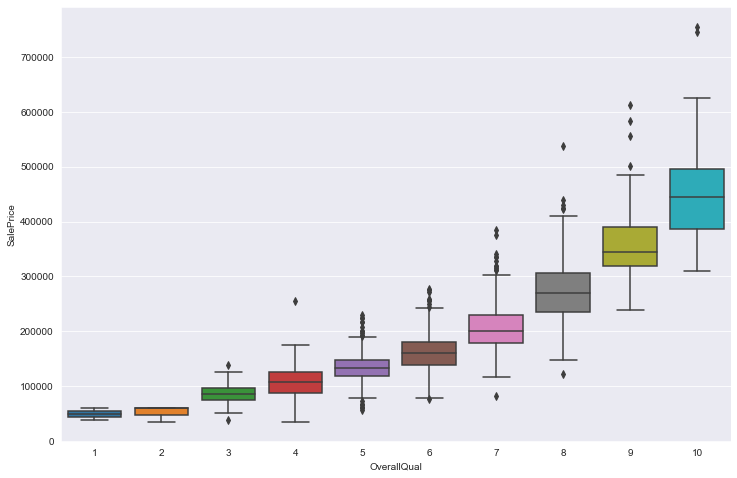

In [8]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

# Univariate Analysis

Skewness of the price distribution is 1.8812964895244009 and Kurtosis of the price distribution is 6.523066888485879


Text(0.5, 1.0, 'SalePrice distribution')

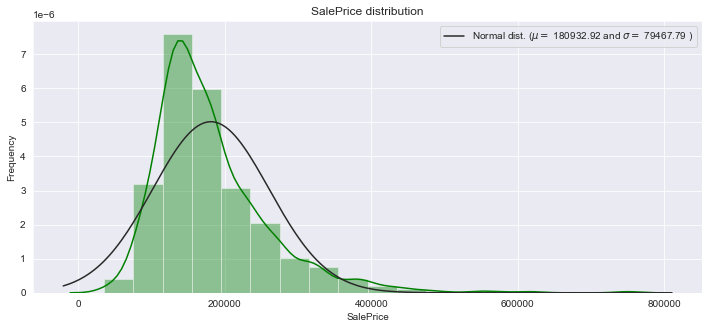

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(train['SalePrice'] , fit=norm, bins=18, color='green')
(mu, sigma) = norm.fit(train['SalePrice'])
print('Skewness of the price distribution is', train['SalePrice'].skew(), 'and Kurtosis of the price distribution is',
     train['SalePrice'].kurtosis())
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

As the Output variable distribution is not normal and skewed to Right, it is imperative to scale it using Log scale. This will be instrumental in reducing Heteroskedasticity. 

In [10]:
train["SalePrice"] = np.log(train["SalePrice"])

Skewness of the price distribution is 0.12156821443518166 and Kurtosis of the price distribution is 0.8047636129011364


Text(0.5, 1.0, 'SalePrice distribution')

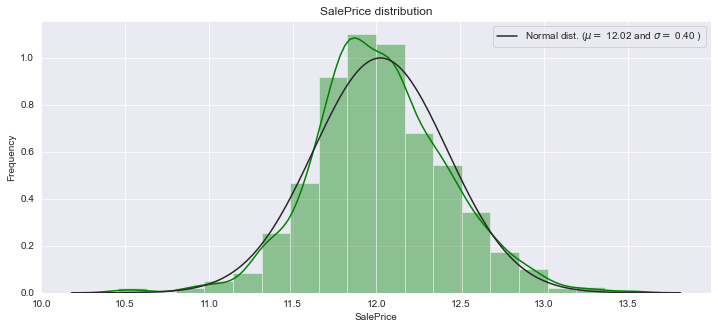

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(train['SalePrice'] , fit=norm, bins=18, color='green')
(mu, sigma) = norm.fit(train['SalePrice'])
print('Skewness of the price distribution is', train['SalePrice'].skew(), 'and Kurtosis of the price distribution is',
     train['SalePrice'].kurtosis())
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [12]:
mv = df.isnull().sum() * 100/len(df)
mv = pd.DataFrame(mv,columns=['Missing_perc']).sort_values(by='Missing_perc', ascending=False)

In [13]:
mv_df = mv[mv.Missing_perc != 0].drop(['SalePrice'])

In [14]:
mv_df.head()

,Missing_perc
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


Text(0.5, 1.0, 'Bar Plot for Missing Value Percentages')

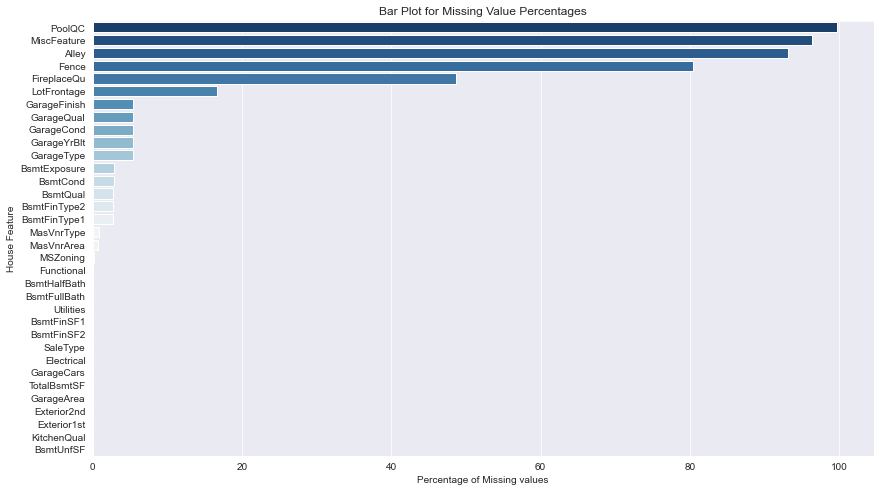

In [15]:
plt.figure(figsize=(14,8))
sns.barplot(x=mv_df.Missing_perc, y=mv_df.index, palette="RdBu_r")
plt.xlabel('Percentage of Missing values')
plt.ylabel('House Feature')
plt.title('Bar Plot for Missing Value Percentages')

We have to now impute missing data in 2 parts by referring to the Dataset Description to find what missing value means for
each of them - 
Part 1 :
1. PoolQC - No Pool.
2. MiscFeature - No Miscellaneous Features
3. Alley - No Alley
4. Fence - No Fence
5. FireplaceQu - No Fireplace
6. LotFrontage - Median of LotFrontage for the particular neighborhood.
7. GarageFinish - No Garage
8. GarageQual - No Garage
9. GarageCond - No Garage
10. GarageYrBlt - 0
11. GarageType - No Garage
12. BsmtExposure - No Basement
13. BsmtCond - No Basement
14. BsmtQual - No Basement
15. BsmtFinType2 - No Basement
16. BsmtFinType1 - No Basement
17. MasVnrType - No Masonary Veneer
18. MasVnrArea - 0

In [16]:
for col in 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish', 'GarageQual','GarageCond','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType':
    df[col] = df[col].fillna('None')

In [17]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [18]:
for col in 'GarageYrBlt','MasVnrArea':
    df[col] = df[col].fillna(0)

Part 2:
19. MSZoning - 78% of houses are RL category. Fill with RL
20. Functional - 93% of houses are Typ category. Fill with Typ
21. BsmtHalfBath - 0
22. BsmtFullBath - 0
23. Utilities - Drop column as almost all values are AllPub
24. BsmtFinSF1 - 0
25. BsmtFinSF2 - 0
26. SaleType - 87% of houses are of sale type WD
27. Electrical - 87% of houses have SBrkr Electrical system
28. Garage Cars - 0
29. TotalBsmtSF - 0
30. GarageArea - 0
31. Exterior2nd - Majority of houses have VinylSd Exterior
32. Exterior1st - Majority of houses have VinylSd Exterior
33. KitchenQual - Majority of houses have TA (Typical/Average) quality 
34. BsmtUnfSF - 0

In [19]:
for col in 'MSZoning','Functional','SaleType','Electrical','Exterior2nd','Exterior1st','KitchenQual':
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
for col in 'BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','GarageCars','TotalBsmtSF','GarageArea','BsmtUnfSF':
    df[col] = df[col].fillna(0)

In [21]:
df.drop(['Utilities'], axis=1, inplace=True)

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


The dataframe has multiple columns which have numeric values but are categorical variables - MSSubClass, GarageYrBuilt, YearBuilt, YearRemodAdd, MoSold, YrSold

In [23]:
for col in 'MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','OverallQual','OverallCond':
    df[col] = df[col].astype(str)

In [24]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

In [25]:
categorical_cols = ('MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
                    'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle',
                    'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','Heating','CentralAir','Electrical','Functional','FireplaceQu','GarageType','GarageYrBlt',
                    'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold',
                    'SaleType','SaleCondition')

In [26]:
le = LabelEncoder()
for c in categorical_cols:
    le.fit(list(df[c].values)) 
    df[c] = le.transform(list(df[c].values))

In [27]:
ordinal_cols = ('OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual')

In [28]:
oe = OrdinalEncoder()
for c in ordinal_cols:
    df[c] = oe.fit_transform(df[c].values.reshape(-1,1))

In [29]:
numerical_cols = ('LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                  '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal')

In [30]:
scaler = MinMaxScaler()
for c in numerical_cols:
    scaler.fit_transform(df[c].values.reshape(-1,1))

In [31]:
df.to_csv('datapreprocessing-output.csv')